# Grammar and Product Reviews

# Downloading dataset from kaggle
Since the size of file is large, uploading file on google colab takes time. We will directly download the file from kaggle.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datafiniti/grammar-and-online-product-reviews

 56% 5.00M/8.95M [00:00<00:00, 46.8MB/s]
100% 8.95M/8.95M [00:00<00:00, 41.4MB/s]


In [ ]:
! unzip /content/grammar-and-online-product-reviews.zip

Archive:  /content/grammar-and-online-product-reviews.zip
  inflating: GrammarandProductReviews.csv  


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("GrammarandProductReviews.csv")
df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [ ]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.215800e+04,32508.000000,71044.000000
mean,7.944753e+07,0.410422,4.385747
std,4.842696e+07,3.574442,1.067659
min,2.187400e+04,0.000000,1.000000
25%,3.355342e+07,0.000000,4.000000
50%,7.124763e+07,0.000000,5.000000
75%,1.112628e+08,0.000000,5.000000
max,1.038227e+09,183.000000,5.000000


In [ ]:
df.describe(include = [object]).loc[['count','unique']]

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
count,71044,71044,71044,71044,71044,39065,71044,70903,70841,71044,70977,71044,71044,32158,60429,71044,71008,70568,5410,449,70948,71042
unique,600,392,581,598,354,473,600,463,583,600,13789,3199,17469,2,2,22508,64913,42682,2282,52,58088,562


# Exploratory Data Analysis

### Missing values 

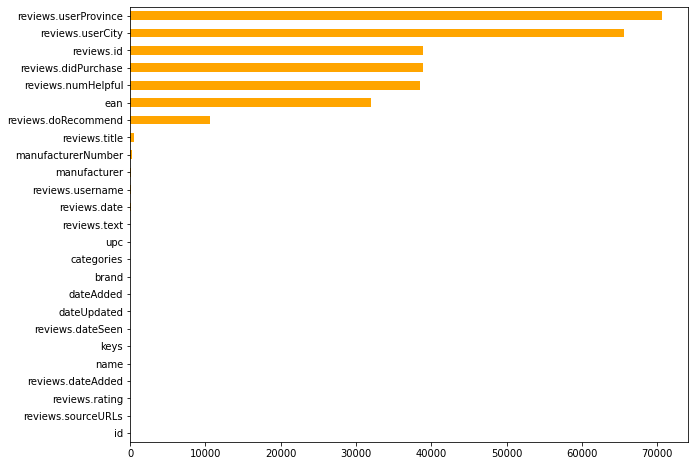

In [ ]:
df.isnull().sum().sort_values(ascending = True).plot.barh(figsize = (10,8), color = 'orange')


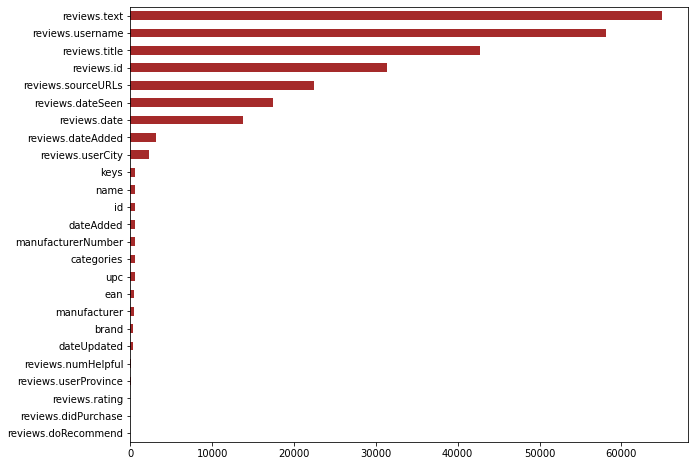

In [ ]:
df.nunique().sort_values(ascending = True).plot.barh(figsize = (10,8), color = 'brown')

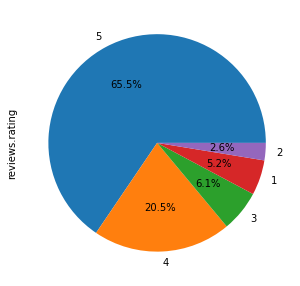

In [ ]:
df['reviews.rating'].value_counts().plot(kind = 'pie',  autopct='%1.01f%%', figsize = (5,5))

In [ ]:
df['reviews.doRecommend'].value_counts()

True     55587
False     4842
Name: reviews.doRecommend, dtype: int64

### Word Cloud for customers who purchased the product
Excluding fake reviews - writing reviews without purchasing the product.

In [ ]:
do_recommend = df[(df['reviews.doRecommend'] == True) & (df['reviews.didPurchase'] == True)]['reviews.text'].dropna()
do_not_recommend = df[(df['reviews.doRecommend'] == False) & (df['reviews.didPurchase'] == True)]['reviews.text'].dropna()
len(do_recommend), len(do_not_recommend)

(3315, 293)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def create_wordcloud(text, title):
  stop_words = list(set(STOPWORDS))
  word_cloud = WordCloud( stopwords = stop_words, scale = 4, min_font_size = 6).generate(' '.join(text.tolist()))
  plt.figure(figsize = (15, 10))
  plt.imshow(word_cloud)
  plt.title(title)
  plt.axis("off")
  plt.show()

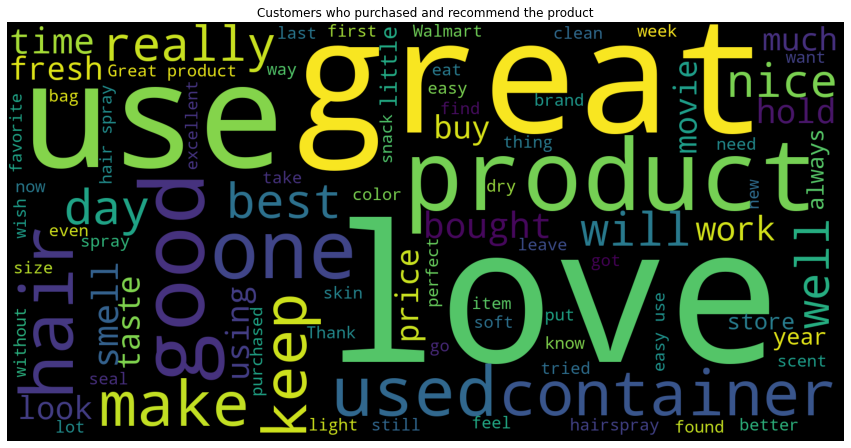

In [ ]:
create_wordcloud(do_recommend,'Customers who purchased and recommend the product')

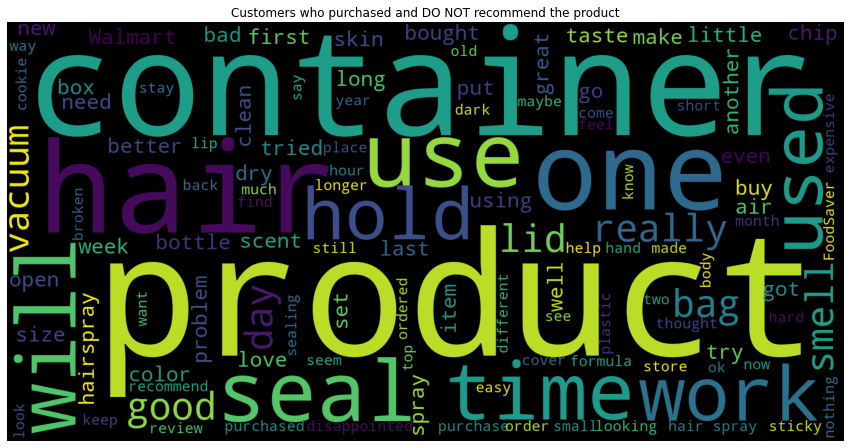

In [ ]:
create_wordcloud(do_not_recommend,'Customers who purchased and DO NOT recommend the product')


## Distribution of Length of Reviews

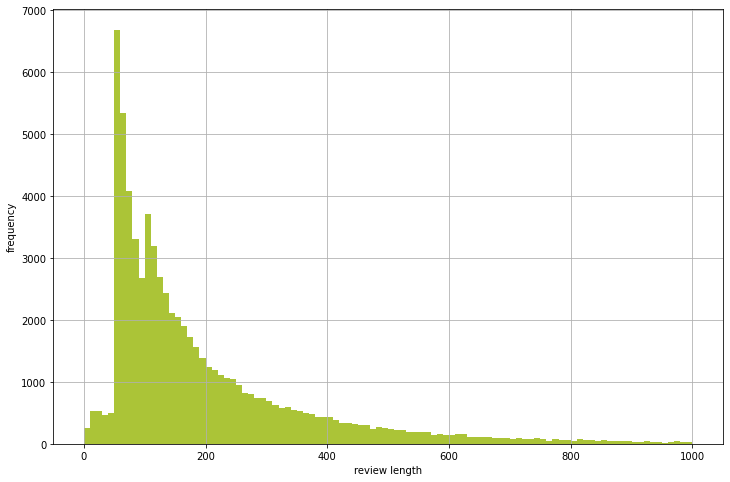

In [ ]:
plt.figure(figsize=(12, 8))
df['text_length'].hist(bins = 100, range=(0, 1000), color = '#ABC437')
plt.xlabel('review length')  
plt.ylabel('frequency')
plt.show()

## Average length of Reviews for different ratings

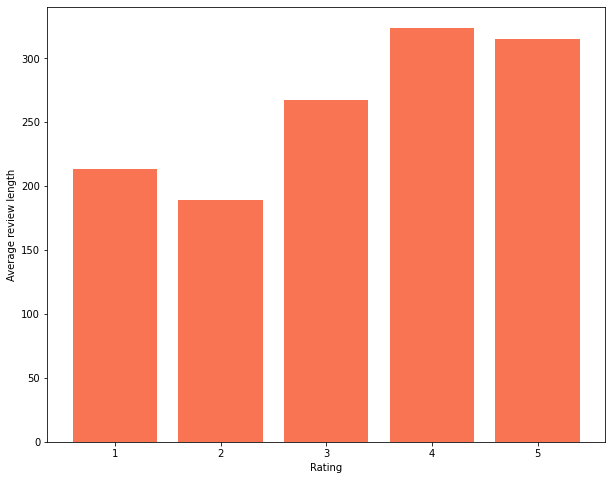

In [ ]:

df['text_length']  = df['reviews.text'].str.len()

avg_review_len = []
for i in range(5):
  avg_review_len.append(df.groupby('reviews.rating')['text_length'].get_group(i+1).mean())

plt.figure(figsize = (10,8))
plt.bar( df['reviews.rating'].value_counts().index, avg_review_len, color = '#F87453')
plt.ylabel('Average review length')
plt.xlabel('Rating')
plt.show()


# **Ratings prediction from review**

## Data Preprocessing
* Tokenizing
* Removing non-alphabetic characters
* Removing stopwords
* Removing punctations


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Tokenization

In [ ]:
data = pd.DataFrame(df['reviews.text'].dropna())
data.head()

,reviews.text
0,i love this album. it's very good. more to the...
1,Good flavor. This review was collected as part...
2,Good flavor.
3,I read through the reviews on here before look...
4,My husband bought this gel for us. The gel cau...


In [ ]:
from nltk.tokenize import TweetTokenizer

def tokenize(column):

# Returns a list of tokens. It is capable of handling abbrevations such as-  it's, we're, don't.
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(column)
    return [w for w in tokens if w.isalpha]

In [ ]:

data['tokenized'] = data['reviews.text'].dropna().apply(lambda x: tokenize(x))
data.head()

,reviews.text,tokenized
0,i love this album. it's very good. more to the...,"[i, love, this, album, ., it's, very, good, .,..."
1,Good flavor. This review was collected as part...,"[Good, flavor, ., This, review, was, collected..."
2,Good flavor.,"[Good, flavor, .]"
3,I read through the reviews on here before look...,"[I, read, through, the, reviews, on, here, bef..."
4,My husband bought this gel for us. The gel cau...,"[My, husband, bought, this, gel, for, us, ., T..."


### Removing stopwords

In [ ]:
def remove_stopwords(tokenized_column):

# this fuction will return a list of tokens with English stopwords removed
    stops = set(stopwords.words('english'))
    return [word for word in tokenized_column if not word in stops]

In [ ]:
data['stopwords_removed'] = data.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
data[['tokenized', 'stopwords_removed']].head()

,tokenized,stopwords_removed
0,"[i, love, this, album, ., it's, very, good, .,...","[love, album, ., good, ., hip, hop, side, curr..."
1,"[Good, flavor, ., This, review, was, collected...","[Good, flavor, ., This, review, collected, par..."
2,"[Good, flavor, .]","[Good, flavor, .]"
3,"[I, read, through, the, reviews, on, here, bef...","[I, read, reviews, looking, buying, one, coupl..."
4,"[My, husband, bought, this, gel, for, us, ., T...","[My, husband, bought, gel, us, ., The, gel, ca..."


### Removing Punctuations

In [ ]:
import string 

def remove_punctuations(column):
# this fuction will return a list of tokens with punctuations removed
    
    return [word for word in column if word not in string.punctuation]

In [ ]:

data['punct_removed'] = data.apply(lambda x: remove_punctuations(x['stopwords_removed']), axis=1)
data[['stopwords_removed','punct_removed']].head()



,stopwords_removed,punct_removed
0,"[love, album, ., good, ., hip, hop, side, curr...","[love, album, good, hip, hop, side, current, p..."
1,"[Good, flavor, ., This, review, collected, par...","[Good, flavor, This, review, collected, part, ..."
2,"[Good, flavor, .]","[Good, flavor]"
3,"[I, read, reviews, looking, buying, one, coupl...","[I, read, reviews, looking, buying, one, coupl..."
4,"[My, husband, bought, gel, us, ., The, gel, ca...","[My, husband, bought, gel, us, The, gel, cause..."


### Stemming

In [ ]:
from nltk.stem import PorterStemmer


def apply_stemming(tokenized_column):

  # this function will return a list of tokens with PorterStemming applied
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [ ]:
data['porter_stemmed'] = data.apply(lambda x: apply_stemming(x['punct_removed']), axis=1)
data[['punct_removed','porter_stemmed']].head()

,punct_removed,porter_stemmed
0,"[love, album, good, hip, hop, side, current, p...","[love, album, good, hip, hop, side, current, p..."
1,"[Good, flavor, This, review, collected, part, ...","[good, flavor, thi, review, collect, part, pro..."
2,"[Good, flavor]","[good, flavor]"
3,"[I, read, reviews, looking, buying, one, coupl...","[I, read, review, look, buy, one, coupl, lubri..."
4,"[My, husband, bought, gel, us, The, gel, cause...","[My, husband, bought, gel, us, the, gel, caus,..."


### Rejoin Words

In [ ]:
def rejoin_words(tokenized_column):

# this fuction will rejoin the tokenized words list into a single string
    return (" ".join(tokenized_column))

In [ ]:
data['review'] = data.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
data[['porter_stemmed','review']].head()

,porter_stemmed,review
0,"[love, album, good, hip, hop, side, current, p...",love album good hip hop side current pop sound...
1,"[good, flavor, thi, review, collect, part, pro...",good flavor thi review collect part promot
2,"[good, flavor]",good flavor
3,"[I, read, review, look, buy, one, coupl, lubri...",I read review look buy one coupl lubric ultim ...
4,"[My, husband, bought, gel, us, the, gel, caus,...",My husband bought gel us the gel caus irrit fe...


In [ ]:
data['rating'] = df.dropna(subset = ['reviews.text'])['reviews.rating']
data.head()

,reviews.text,tokenized,stopwords_removed,punct_removed,porter_stemmed,review,rating
0,i love this album. it's very good. more to the...,"[i, love, this, album, ., it's, very, good, .,...","[love, album, ., good, ., hip, hop, side, curr...","[love, album, good, hip, hop, side, current, p...","[love, album, good, hip, hop, side, current, p...",love album good hip hop side current pop sound...,5
1,Good flavor. This review was collected as part...,"[Good, flavor, ., This, review, was, collected...","[Good, flavor, ., This, review, collected, par...","[Good, flavor, This, review, collected, part, ...","[good, flavor, thi, review, collect, part, pro...",good flavor thi review collect part promot,5
2,Good flavor.,"[Good, flavor, .]","[Good, flavor, .]","[Good, flavor]","[good, flavor]",good flavor,5
3,I read through the reviews on here before look...,"[I, read, through, the, reviews, on, here, bef...","[I, read, reviews, looking, buying, one, coupl...","[I, read, reviews, looking, buying, one, coupl...","[I, read, review, look, buy, one, coupl, lubri...",I read review look buy one coupl lubric ultim ...,1
4,My husband bought this gel for us. The gel cau...,"[My, husband, bought, this, gel, for, us, ., T...","[My, husband, bought, gel, us, ., The, gel, ca...","[My, husband, bought, gel, us, The, gel, cause...","[My, husband, bought, gel, us, the, gel, caus,...",My husband bought gel us the gel caus irrit fe...,1


## Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['rating'], test_size = 0.2, random_state = 45)
X_train.shape, X_test.shape

((56806,), (14202,))

## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True)
vect_bog = vectorizer.fit_transform(X_train)
vect_bog_test = vectorizer.transform(X_test)
vect_bog

<56806x17515 sparse matrix of type '<class 'numpy.int64'>'
	with 1059931 stored elements in Compressed Sparse Row format>

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(lowercase=True, min_df = 10)
vect_tfidf = vect.fit_transform(X_train)
vect_tfidf_test = vect.transform(X_test)
vect_tfidf


<56806x4240 sparse matrix of type '<class 'numpy.float64'>'
	with 1030539 stored elements in Compressed Sparse Row format>

## Model Building

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model_lr1 = LogisticRegression(max_iter = 100)
model_lr1.fit(vect_bog,y_train)
pred_lr1 = model_lr1.predict(vect_bog_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_lr2 = LogisticRegression(max_iter = 100)
model_lr2.fit(vect_tfidf,y_train)
pred_lr2 = model_lr2.predict(vect_tfidf_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb1 = MultinomialNB()
model_nb1.fit(vect_bog,y_train)
pred_nb1 = model_nb1.predict(vect_bog_test)




In [ ]:
model_nb2 = MultinomialNB()
model_nb2.fit(vect_tfidf,y_train)
pred_nb2 = model_nb2.predict(vect_tfidf_test)





### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model_svm1 = SVC()
model_svm1.fit(vect_bog,y_train)
pred_svm1 = model_svm1.predict(vect_bog_test)


In [ ]:
model_svm2 = SVC()
model_svm2.fit(vect_tfidf,y_train)
pred_svm2 = model_svm2.predict(vect_tfidf_test)

### Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree1 = DecisionTreeClassifier()
model_tree1.fit(vect_bog,y_train)
pred_tree1 = model_tree1.predict(vect_bog_test)



In [ ]:
model_tree2 = DecisionTreeClassifier()
model_tree2.fit(vect_tfidf,y_train)
pred_tree2 = model_tree2.predict(vect_tfidf_test)

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_forest1 = RandomForestClassifier()
model_forest1.fit(vect_bog,y_train)
pred_forest1 = model_forest1.predict(vect_bog_test)



In [ ]:
model_forest2 = RandomForestClassifier()
model_forest2.fit(vect_tfidf,y_train)
pred_forest2 = model_forest2.predict(vect_tfidf_test)


###XGBoost

In [ ]:
from xgboost import XGBClassifier

model_xg1 = XGBClassifier()
model_xg1.fit(vect_bog,y_train)
pred_xg1 = model_xg1.predict(vect_bog_test)


In [ ]:
model_xg2 = XGBClassifier()
model_xg2.fit(vect_tfidf,y_train)
pred_xg2 = model_xg2.predict(vect_tfidf_test)

# **Evaluation**

### Logistic Regression 

              precision    recall  f1-score   support

           1       0.66      0.71      0.68       718
           2       0.21      0.33      0.26       233
           3       0.25      0.39      0.30       545
           4       0.23      0.44      0.30      1576
           5       0.92      0.77      0.84     11130

    accuracy                           0.71     14202
   macro avg       0.46      0.53      0.48     14202
weighted avg       0.79      0.71      0.74     14202



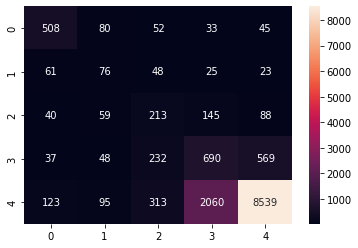

In [ ]:

print(classification_report(pred_lr1, y_test))
cm_lr1 = confusion_matrix(pred_lr1, y_test)
sns.heatmap(cm_lr1, annot=True, fmt = '2d')

              precision    recall  f1-score   support

           1       0.65      0.73      0.69       682
           2       0.07      0.36      0.12        72
           3       0.20      0.47      0.28       368
           4       0.22      0.44      0.30      1497
           5       0.94      0.75      0.83     11583

    accuracy                           0.71     14202
   macro avg       0.42      0.55      0.44     14202
weighted avg       0.83      0.71      0.75     14202



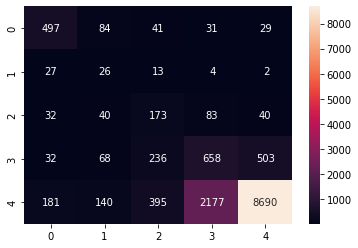

In [ ]:

print(classification_report(pred_lr2, y_test))
cm_lr2 = confusion_matrix(pred_lr2, y_test)
sns.heatmap(cm_lr2, annot=True, fmt = '2d')

###Naive Bayes

              precision    recall  f1-score   support

           1       0.77      0.53      0.63      1127
           2       0.04      0.19      0.07        86
           3       0.16      0.36      0.23       393
           4       0.39      0.38      0.39      3006
           5       0.83      0.80      0.81      9590

    accuracy                           0.67     14202
   macro avg       0.44      0.45      0.42     14202
weighted avg       0.71      0.67      0.69     14202



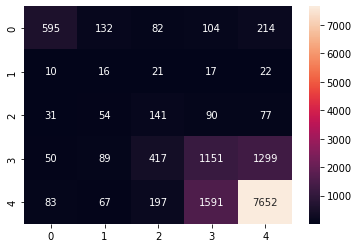

In [ ]:
print(classification_report(pred_nb1, y_test))
cm_nb1 = confusion_matrix(pred_nb1, y_test)
sns.heatmap(cm_nb1, annot=True, fmt = '2d')

              precision    recall  f1-score   support

           1       0.56      0.69      0.62       622
           2       0.01      0.25      0.01         8
           3       0.03      0.54      0.06        52
           4       0.12      0.41      0.19       886
           5       0.97      0.71      0.82     12634

    accuracy                           0.69     14202
   macro avg       0.34      0.52      0.34     14202
weighted avg       0.90      0.69      0.77     14202



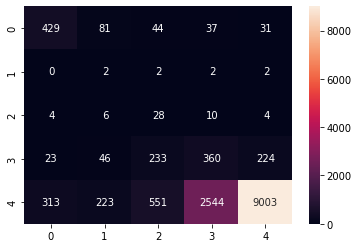

In [ ]:
print(classification_report(pred_nb2, y_test))
cm_nb2 = confusion_matrix(pred_nb2, y_test)
sns.heatmap(cm_nb2, annot=True, fmt = '2d')

### Support Vector 

In [ ]:
print(classification_report(pred_svm1, y_test))
cm_svm1 = confusion_matrix(pred_svm1, y_test)
sns.heatmap(cm_svm1, annot=True, fmt = '2d')

In [ ]:
print(classification_report(pred_svm2, y_test))
cm_svm2 = confusion_matrix(pred_svm2, y_test)
sns.heatmap(cm_svm2, annot=True, fmt = '2d')

### Decision Tree

              precision    recall  f1-score   support

           1       0.56      0.61      0.59       706
           2       0.22      0.28      0.25       278
           3       0.28      0.33      0.30       721
           4       0.34      0.36      0.35      2814
           5       0.80      0.77      0.78      9683

    accuracy                           0.65     14202
   macro avg       0.44      0.47      0.45     14202
weighted avg       0.66      0.65      0.65     14202



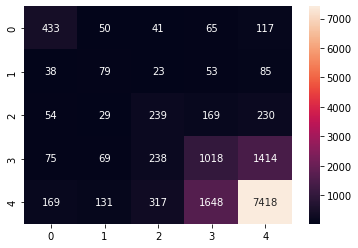

In [ ]:
print(classification_report(pred_tree1, y_test))
cm_tree1 = confusion_matrix(pred_tree1, y_test)
sns.heatmap(cm_tree1, annot=True, fmt = '2d')

              precision    recall  f1-score   support

           1       0.54      0.59      0.57       700
           2       0.25      0.32      0.28       285
           3       0.27      0.34      0.30       701
           4       0.36      0.38      0.37      2830
           5       0.80      0.77      0.78      9686

    accuracy                           0.65     14202
   macro avg       0.45      0.48      0.46     14202
weighted avg       0.66      0.65      0.66     14202



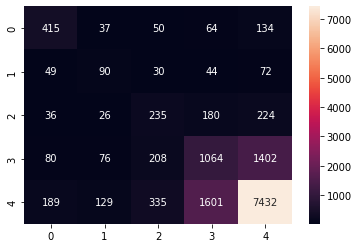

In [ ]:
print(classification_report(pred_tree2, y_test))
cm_tree2 = confusion_matrix(pred_tree2, y_test)
sns.heatmap(cm_tree2, annot=True, fmt = '2d')

### Random Forest

              precision    recall  f1-score   support

           1       0.55      0.90      0.68       466
           2       0.19      0.99      0.31        68
           3       0.18      0.79      0.29       193
           4       0.21      0.64      0.31       959
           5       0.98      0.73      0.84     12516

    accuracy                           0.73     14202
   macro avg       0.42      0.81      0.49     14202
weighted avg       0.90      0.73      0.78     14202



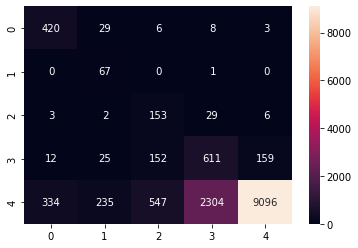

In [ ]:
print(classification_report(pred_forest1, y_test))
cm_forest1 = confusion_matrix(pred_forest1, y_test)
sns.heatmap(cm_forest1, annot=True, fmt = '2d')

              precision    recall  f1-score   support

           1       0.58      0.87      0.70       509
           2       0.18      0.93      0.31        71
           3       0.19      0.78      0.30       203
           4       0.21      0.67      0.32       923
           5       0.98      0.73      0.84     12496

    accuracy                           0.73     14202
   macro avg       0.43      0.80      0.49     14202
weighted avg       0.90      0.73      0.79     14202



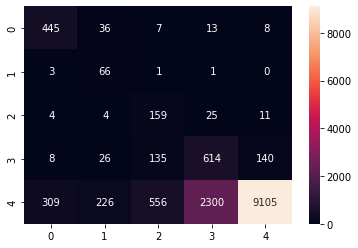

In [ ]:
print(classification_report(pred_forest2, y_test))
cm_forest2 = confusion_matrix(pred_forest2, y_test)
sns.heatmap(cm_forest2, annot=True, fmt = '2d')

### XGBoost

              precision    recall  f1-score   support

           1       0.37      0.79      0.51       364
           2       0.01      0.50      0.03        10
           3       0.05      0.49      0.10        95
           4       0.06      0.52      0.12       366
           5       0.99      0.69      0.81     13367

    accuracy                           0.68     14202
   macro avg       0.30      0.60      0.31     14202
weighted avg       0.94      0.68      0.78     14202



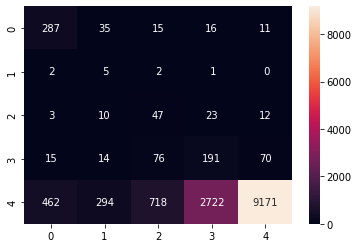

In [ ]:
print(classification_report(pred_xg1, y_test))
cm_xg1 = confusion_matrix(pred_xg1, y_test)
sns.heatmap(cm_xg1, annot=True, fmt = '2d')

              precision    recall  f1-score   support

           1       0.37      0.80      0.51       361
           2       0.03      0.82      0.05        11
           3       0.07      0.52      0.12       107
           4       0.07      0.52      0.12       393
           5       0.99      0.69      0.81     13330

    accuracy                           0.69     14202
   macro avg       0.30      0.67      0.32     14202
weighted avg       0.94      0.69      0.78     14202



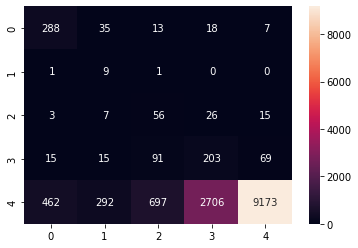

In [ ]:
print(classification_report(pred_xg2, y_test))
cm_xg2 = confusion_matrix(pred_xg2, y_test)
sns.heatmap(cm_xg2, annot=True, fmt = '2d')

Random Forest is giving best accuracy 73%.

# **Clustering**

In [ ]:
from sklearn.cluster import KMeans

[54965.35858362878, 53969.15962314297, 53334.090526126776, 52883.49857367347, 52604.41604912911, 52334.8515198867, 52042.75042174749, 51801.006691448594, 51614.74999107422, 51453.71821026667, 51317.24046790882, 51155.608111596535, 51033.89460333063, 50938.95114767892, 50774.590533191746, 50684.46841272464, 50550.341485838355, 50465.55450451201, 50421.11031962314, 50305.19148900302, 50168.05505263439, 50140.44389052387, 50044.99229191072, 49997.1540171207, 49883.79418477848, 49797.355407285315, 49798.23774917079, 49699.432513413776, 49574.89351382901]


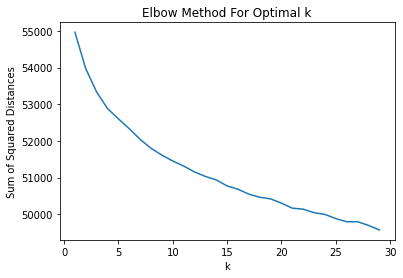

In [ ]:


sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(vect_tfidf)
    sum_of_squared_distances.append(km.inertia_)

ax = sns.lineplot(x=K, y=sum_of_squared_distances)
print(sum_of_squared_distances)

plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k = 13
model = KMeans(init = "k-means++", n_clusters = k, max_iter = 25, n_init = 1)
model.fit(vect_tfidf)

KMeans(max_iter=25, n_clusters=13, n_init=1)

In [ ]:
# Get the cluster labels

clust_labels = pd.Series(model.predict(vect_tfidf_test),index = X_test.index , name = "cluster" )
cent = model.cluster_centers_
kmeans_labels = pd.merge(df['reviews.text'].iloc[X_test.index], clust_labels, right_index = True, left_index = True)
kmeans_labels


,reviews.text,cluster
4525,This vacuum has everything I need. There are n...,0
70635,These are easy to apply and look really nice f...,0
22966,I love the total care shampoo and conditioner....,8
65200,If you watched the first movie you need to see...,1
7491,I love these wipes! they are perfect to use al...,3
...,...,...
51656,Love the feel!,0
46283,I love Keri. I have been using it for 30 years...,2
61382,I have tried many products over the years with...,0
7177,I like the lemony smell and knowing it's clean...,10


In [ ]:
cluster = kmeans_labels.groupby('cluster')
cluster.get_group(10)['reviews.text'][:15]

10862    These are so convenient and work well for smal...
10897    Use these at my salon as well as at home I LOV...
12722    Great cleaning product! So easy to use when in...
13922    Tried using other methods but end up coming ba...
16290    The lip shimmers are terrific. I use a lot of ...
14690    Really convenient for cleaning on the go or a ...
11396    I carry these with me everywhere, in the car a...
14193    I love clorox products they are wonderful conv...
7695     I love the convenience. But have to make sure ...
38202    I loved how this product worked! I decided to ...
14057    I have used this product for years and found i...
50129    Loved the ease of use and the clothes came out...
29212    Received from Influenster in exchange for a re...
10692    Love to use Clorox products in the bathroom, e...
14124    As a teacher I'm always in need of cleaning su...
Name: reviews.text, dtype: object

These reviews are all related to cleaning products.

In [ ]:
cluster.get_group(2)['reviews.text'][:20]


65200    If you watched the first movie you need to see...
68147    My grandson loved the movie, the trucks and cr...
41107    Got this for grand kids to keep them entertain...
39555    Watching this movie I could see my own pets do...
41793    Great movie, our son absolutely loves it. We'v...
34849    this is a great movie everyone liked it the ki...
6196     I had heard about this movie when it was in th...
42044    This is a very cute movie. The kids have enjoy...
43559    Loved this movie. Great to watch with the kids...
28072    Great movie to watch with my grandchildren & d...
34929    I grew up watching the original animated film....
63217    So it is worth watching and is fun, but could ...
40317    The kids and I loved watching the movie. They ...
43165    This was purchased as a gift for my grand kids...
1610     It's like that so why not watch it with them ....
43039    My nephew and I can watch this movie over and ...
5072     Soon as I got home I had to binge watch the mo.

All movie related reviews are clustered together.

# Insights

## Most frequently used words

In [ ]:
from nltk.probability import FreqDist
word_freq = pd.DataFrame(FreqDist(data['punct_removed'].astype(str).str.lower()).most_common(15),
                             columns=['words', 'count'])
word_freq.head()

,words,count
0,['good'],60
1,['love'],45
2,['great'],44
3,"['great', 'product']",28
4,['excellent'],16


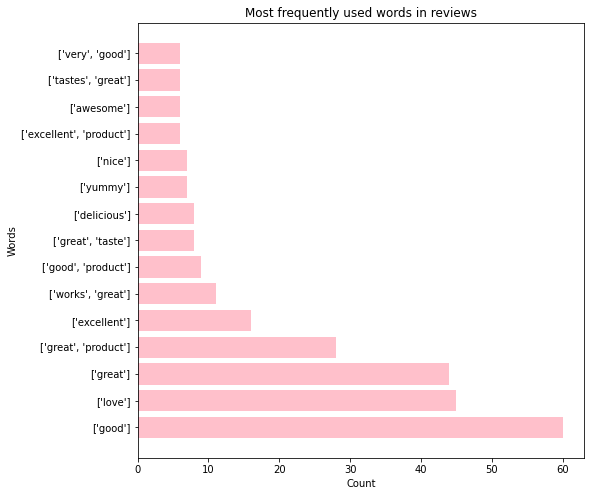

In [ ]:
plt.figure(figsize = (8,8))
plt.barh(word_freq['words'], word_freq['count'], color = 'pink')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most frequently used words in reviews')
plt.show()

## Top 10 most popular brands

In [ ]:
df.groupby('brand')['reviews.rating'].agg(['mean','median','count']).sort_values(by = ['median','count','mean'], ascending = False)[:10]

,mean,median,count
brand,,,
Clorox,4.825421,5.0,10700
Universal Home Video,4.663807,5.0,6178
Tide,4.168091,5.0,5384
Disney,4.722914,5.0,3692
Olay,4.193567,5.0,3420
Warner Home Video,4.349550,5.0,3330
L'Oreal Paris,4.352218,5.0,2683
L'oreal Paris,4.495629,5.0,2288
Sony Pictures,4.357242,5.0,2161


# Top 10 most popular Products

In [ ]:
df.groupby('name')['reviews.rating'].agg(['mean','median','count']).sort_values(by = ['median','count','mean'], ascending = False)[:10]

,mean,median,count
name,,,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,4.821404,5.0,8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital),4.684755,5.0,5510
Tide Original Liquid Laundry Detergent - 100 Oz,3.933105,5.0,3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4.349550,5.0,3330
The Jungle Book (blu-Ray/dvd + Digital),4.739654,5.0,2489
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,4.495629,5.0,2288
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer,4.456255,5.0,2286
Clorox Disinfecting Bathroom Cleaner,4.841854,5.0,2093
"Tide Pods Detergent, Botanical Rain, 61ct",4.603924,5.0,1886


# Topic Modelling

In [ ]:

name_group = df.groupby('name')
top_10_products = df.groupby('name')['reviews.rating'].agg(['mean','median','count']).sort_values(by = ['median','count','mean'], ascending = False)[:10].index
product_reviews = []
for i in top_10_products:
  product_reviews.append(' '.join(name_group.get_group(i)['reviews.text'].dropna()))




In [ ]:
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
def preprocess_data(doc_set):

    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

In [ ]:
def prepare_corpus(doc_clean):
    
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words): 
   
    dictionary, doc_term_matrix=prepare_corpus(doc_clean)
    lsa_model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  
    topics=lsa_model.print_topics(num_topics=number_of_topics, num_words=words)
    print(lsa_model.print_topics(num_topics=number_of_topics, num_words=words))
    return lsa_model,topics

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
clean_reviews = preprocess_data(product_reviews)

In [ ]:

number_of_topics = 10
words = 10
model, topics = create_gensim_lsa_model(clean_reviews, number_of_topics, words)

[(0, '0.350*"review" + 0.345*"part" + 0.342*"collect" + 0.340*"promot" + 0.340*"use" + 0.261*"clean" + 0.227*"wipe" + 0.224*"love" + 0.219*"product" + 0.159*"clorox"'), (1, '0.710*"movi" + 0.241*"great" + 0.171*"watch" + 0.163*"love" + 0.154*"kid" + 0.153*"good" + -0.149*"wipe" + 0.142*"famili" + 0.126*"enjoy" + 0.113*"godzilla"'), (2, '-0.339*"hair" + 0.306*"wipe" + 0.274*"movi" + -0.258*"product" + 0.214*"clorox" + 0.206*"clean" + -0.186*"tide" + -0.182*"condition" + -0.171*"skin" + -0.160*"feel"'), (3, '0.464*"tide" + 0.373*"pod" + -0.323*"hair" + 0.303*"cloth" + -0.174*"condition" + 0.161*"deterg" + 0.159*"use" + -0.158*"movi" + 0.156*"laundri" + 0.149*"clean"'), (4, '-0.489*"skin" + 0.394*"hair" + -0.330*"moistur" + -0.221*"face" + 0.212*"condition" + -0.191*"feel" + -0.138*"use" + 0.133*"receiv" + 0.122*"tide" + 0.122*"shampoo"'), (5, '-0.680*"godzilla" + 0.288*"kid" + 0.234*"famili" + 0.198*"funni" + -0.177*"monster" + 0.155*"love" + 0.144*"pet" + -0.119*"effect" + -0.118*"actio

In [ ]:
for i in topics:
  print(i)

(0, '0.350*"review" + 0.345*"part" + 0.342*"collect" + 0.340*"promot" + 0.340*"use" + 0.261*"clean" + 0.227*"wipe" + 0.224*"love" + 0.219*"product" + 0.159*"clorox"')
(1, '0.710*"movi" + 0.241*"great" + 0.171*"watch" + 0.163*"love" + 0.154*"kid" + 0.153*"good" + -0.149*"wipe" + 0.142*"famili" + 0.126*"enjoy" + 0.113*"godzilla"')
(2, '-0.339*"hair" + 0.306*"wipe" + 0.274*"movi" + -0.258*"product" + 0.214*"clorox" + 0.206*"clean" + -0.186*"tide" + -0.182*"condition" + -0.171*"skin" + -0.160*"feel"')
(3, '0.464*"tide" + 0.373*"pod" + -0.323*"hair" + 0.303*"cloth" + -0.174*"condition" + 0.161*"deterg" + 0.159*"use" + -0.158*"movi" + 0.156*"laundri" + 0.149*"clean"')
(4, '-0.489*"skin" + 0.394*"hair" + -0.330*"moistur" + -0.221*"face" + 0.212*"condition" + -0.191*"feel" + -0.138*"use" + 0.133*"receiv" + 0.122*"tide" + 0.122*"shampoo"')
(5, '-0.680*"godzilla" + 0.288*"kid" + 0.234*"famili" + 0.198*"funni" + -0.177*"monster" + 0.155*"love" + 0.144*"pet" + -0.119*"effect" + -0.118*"action" + -